In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_496.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_5003.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_5942.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_6258.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_2162.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_8021.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_7693.jpeg
/kaggle/input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front/cast_ok_0_4010.jpeg
/kaggle/input/rea

In [33]:
import tensorflow as tf#for back-end

from tensorflow import keras#for back-end

from tensorflow.keras import Sequential#for sequentiality of layers

from tensorflow.keras.layers import Dense,Flatten,Conv2D,Dropout,MaxPool2D #for layers,operations and parameters

from tensorflow.keras.preprocessing.image import img_to_array  #to correctly fit the input into the sample data frame by using matrix

import cv2  #image lib

from PIL import Image #image lib

from tensorflow.keras import optimizers    # for graph optimation in training

In [34]:
import matplotlib.pyplot as plt

img_height=64

img_width=64

defective=os.listdir("../input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/def_front")

ok=os.listdir("../input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front")


In [35]:
label=[]

data=[]
i=0
#iterating through imgs directory
for img in defective :
    try :
        #reading each image
        img_read=plt.imread("../input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/def_front"+"/"+img)
        
        #resizing the images
        img_resize=cv2.resize(img_read,(img_height,img_width))
        
        #converting img to array
        img_array=img_to_array(img_resize)
        
        #taking img data
        data.append(img_array)
        
        if i<=10 :
            print(img_array)
        
        #taking ok or no values
        label.append(0)
    
    except :
        None
    i+=1
for img in ok :
    try :
        #reading each image
        img_read=plt.imread("../input/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/ok_front"+"/"+img)
        
        #resizing the images
        img_resize=cv2.resize(img_read,(img_height,img_width))
        
        #converting img to array
        img_array=img_to_array(img_resize)
        
        #taking img data
        data.append(img_array)
        
        #taking ok or no values
        label.append(1)
    
    except :
        None

[[[181. 181. 181.]
  [181. 181. 181.]
  [178. 178. 178.]
  ...
  [186. 186. 186.]
  [184. 184. 184.]
  [179. 179. 179.]]

 [[179. 179. 179.]
  [177. 177. 177.]
  [179. 179. 179.]
  ...
  [183. 183. 183.]
  [182. 182. 182.]
  [182. 182. 182.]]

 [[178. 178. 178.]
  [178. 178. 178.]
  [177. 177. 177.]
  ...
  [180. 180. 180.]
  [181. 181. 181.]
  [181. 181. 181.]]

 ...

 [[141. 141. 141.]
  [141. 141. 141.]
  [139. 139. 139.]
  ...
  [151. 151. 151.]
  [147. 147. 147.]
  [147. 147. 147.]]

 [[142. 142. 142.]
  [140. 140. 140.]
  [145. 145. 145.]
  ...
  [144. 144. 144.]
  [149. 149. 149.]
  [146. 146. 146.]]

 [[142. 142. 142.]
  [140. 140. 140.]
  [145. 145. 145.]
  ...
  [144. 144. 144.]
  [149. 149. 149.]
  [146. 146. 146.]]]
[[[169. 169. 169.]
  [171. 171. 171.]
  [172. 172. 172.]
  ...
  [158. 158. 158.]
  [157. 157. 157.]
  [157. 157. 157.]]

 [[171. 171. 171.]
  [174. 174. 174.]
  [171. 171. 171.]
  ...
  [155. 155. 155.]
  [155. 155. 155.]
  [156. 156. 156.]]

 [[173. 173. 173.]

In [36]:
#converting data into numpy arrays

img_data=np.array(data)

label=np.array(label)
img_data=img_data/255

# Number of imgaes in first row print(img_data.shape[0])

#label array print(label)


In [37]:
#storing img data into x to get shuffle it
x=np.arange(img_data.shape[0])

#shuffling x
np.random.shuffle(x)

#mapping the original data with shuffled data
img_data=img_data[x]

label=label[x]

print(img_data.shape)
print(label)

(1300, 64, 64, 3)
[0 0 1 ... 1 0 0]


In [38]:
#for traimning and testing
from sklearn.model_selection import train_test_split

#80 are for training and 20 are for testing in every 101 samples
x_train,x_test,y_train,y_test=train_test_split(img_data,label,test_size=0.2,random_state=101)

print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1040, 64, 64, 3) (260, 64, 64, 3) (1040,) (260,)


In [39]:

#INPUT LAYER

#creating model
model=Sequential()

#CNN Usage

#for an input layer
model.add(Conv2D(16,(3,3),input_shape=(img_height,img_width,3),activation='relu'))

#normalization
model.add(MaxPool2D(2,2))

model.add(Dropout(0.2))

#Brings data from 3x3 to one dimension
model.add(Flatten())


#HIDDEN LAYERS

model.add(Dense(64,activation='relu'))

model.add(Dropout(0.5))

#sigmoid is a logistic function----->0 or 1 as output
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 62, 62, 16)        448       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 31, 31, 16)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 31, 31, 16)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 15376)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                984128    
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [53]:
#compiling model
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

#model.evaluate(x_test,y_test,batch_size=128,verbose=1)
res_model=model.fit(x_train, y_train, batch_size=50, epochs=40, verbose=1)

Epoch 1/40
21/21 [==============================] - 2s 48ms/step - loss: 0.0921 - accuracy: 0.9766
Epoch 2/40
21/21 [==============================] - 1s 47ms/step - loss: 0.0880 - accuracy: 0.9694
Epoch 3/40
21/21 [==============================] - 1s 47ms/step - loss: 0.0809 - accuracy: 0.9776
Epoch 4/40
21/21 [==============================] - 1s 48ms/step - loss: 0.0689 - accuracy: 0.9811
Epoch 5/40
21/21 [==============================] - 1s 47ms/step - loss: 0.0672 - accuracy: 0.9826
Epoch 6/40
21/21 [==============================] - 1s 48ms/step - loss: 0.0853 - accuracy: 0.9776
Epoch 7/40
21/21 [==============================] - 1s 46ms/step - loss: 0.0737 - accuracy: 0.9792
Epoch 8/40
21/21 [==============================] - 1s 47ms/step - loss: 0.0540 - accuracy: 0.9906
Epoch 9/40
21/21 [==============================] - 1s 48ms/step - loss: 0.0568 - accuracy: 0.9847
Epoch 10/40
21/21 [==============================] - 1s 48ms/step - loss: 0.0577 - accuracy: 0.9859
Epoch 11/

In [55]:
#capturing data
#

#frame
predictions=model.evaluate(x_test,y_test)




9/9 [==============================] - 0s 11ms/step - loss: 0.3487 - accuracy: 0.8769


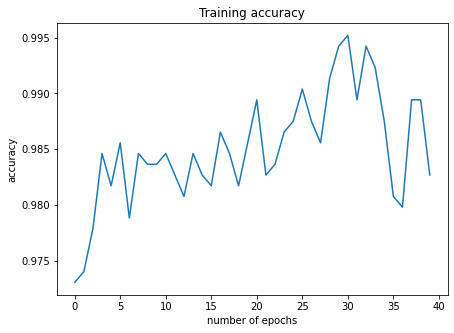

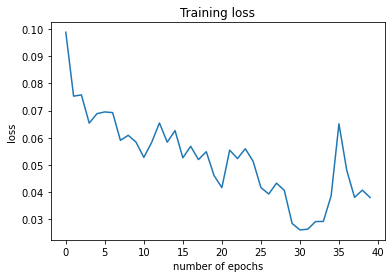

In [56]:
#capturing data
#tf.keras.callbacks.Histroy()

#frame
plt.figure(figsize=(7,5))

acc=res_model.history['accuracy']

loss=res_model.history['loss']

plt.plot(acc)

plt.xlabel('number of epochs')

plt.ylabel('accuracy')

plt.title('Training accuracy')

plt.show()


plt.plot(loss)

plt.xlabel('number of epochs')

plt.ylabel('loss')

plt.title('Training loss')

plt.show()


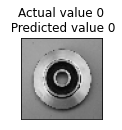

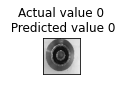

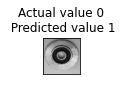

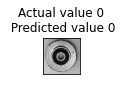

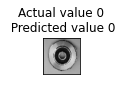

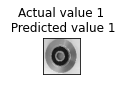

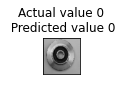

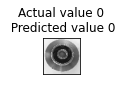

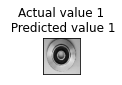

In [57]:
predictions = model.predict(x_test)
plt.figure(1 , figsize = (9, 9))
n = 0
for i in range(9):
    n += 1
    r = np.random.randint( 0, x_test.shape[0] , 1)
    plt.subplot(3, 3, n)
    plt.subplots_adjust(hspace = 1.5, wspace = 1.5)
    plt.imshow(x_test[r[0]])
    plt.title('Actual value {}\n Predicted value {}'.format(y_test[r[0]], round(predictions[r[0]][0])))
    plt.xticks([]) , plt.yticks([])
    plt.show()